# 0.0 - Decision Tree Regressor

O parâmetro utilizado para treinar o algoritmo **Decision Tree Regressor** será a profundidade máxima da árvore, `max_depth`.  
O valor padrão (*default*) é de **max_depth=None**. Para mais detalhes dos parâmetros do algoritmo, recomendamos a documentação oficial em:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html,

*Por padrão, a árvore se expande até que todas as folhas sejam puras ou até que contenham um número de amostras menor que o valor default do parâmetro `min_samples_split`, 2 amostras*.

# 1.0 - Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 2.0 - Carregando os dados

In [2]:
# Treino
X_train = pd.read_csv('data/train/X_training.csv')
y_train = pd.read_csv('data/train/y_training.csv')

# Validação
X_val = pd.read_csv('data/validation/X_validation.csv')
y_val = pd.read_csv('data/validation/y_val.csv')

# Teste
X_test = pd.read_csv('data/test/X_test.csv')
y_test = pd.read_csv('data/test/y_test.csv')

# 3.0 - Funções

In [3]:
def metrics(y, y_pred, step, algorithm):
    """
    Calcula várias métricas de avaliação de um modelo de regressão e as retorna em um DataFrame.

    Parâmetros:
    -----------
    y : array-like
        Valores da variável resposta.
    
    y_pred : array-like
        Valores preditos pelo modelo.
    
    step : str
        Etapa do processo de modelagem (ex: 'treino', 'validação', 'teste').
    
    algorithm : str
        Nome do algoritmo usado.

    Retorno:
    --------
    df_metrics : pandas.DataFrame
        DataFrame contendo as métricas calculadas:
        - 'Algorithm': Nome do algoritmo.
        - 'Step': Etapa do processo (treino, validação ou teste).
        - 'R2': Coeficiente de determinação.
        - 'MSE': Erro quadrático médio.
        - 'RMSE': Raiz do erro quadrático médio.
        - 'MAE': Erro absoluto médio.
        - 'MAPE': Erro percentual absoluto médio.
    """
    # Calcula as métricas
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)

    # Cria o DataFrame com as métricas
    df_metrics = pd.DataFrame({   
        'Algorithm': [algorithm],
        'Step': [step],
        'R2': [np.round(r2, 4)],
        'MSE': [np.round(mse, 4)],
        'RMSE': [np.round(rmse, 4)],
        'MAE': [np.round(mae, 4)],
        'MAPE': [np.round(mape, 4)]
    })
    
    return df_metrics

def exporta_excel(nome_algoritmo):
    """
    Exporta os DataFrames de métricas para arquivos Excel em diferentes pastas.

    Args:
        nome_algoritmo (str): Nome do algoritmo utilizado.

    Returns:
        None
    """
    etapas = ['train', 'validation', 'test']
    df_list = [df_metrics_train, df_metrics_val, df_metrics_test]

    for etapa, df in zip(etapas, df_list):
        df.to_excel(f'metrics/{etapa}/{nome_algoritmo}_{etapa}.xlsx', index=False)

# 4.0 - Ajustando os dados

In [4]:
# transformação do formato DataFrame para Series, essencialmente um array unidimensional
y_train, y_val, y_test = [ df.loc[:, 'song_popularity'] for df in [y_train, y_val, y_test] ]

# 5.0 - Desempenho do modelo

## 5.1 - Dados de treino

In [5]:
# Definição do modelo
# Vamos inciar com 'max_depth' = None (valor padrão)
decision_tree_train = DecisionTreeRegressor( random_state = 0 )

# Treinamento do algoritmo. 
decision_tree_train.fit(X_train, y_train)

# Predição sobre os dados de treino
y_pred_train = decision_tree_train.predict(X_train)

# Métricas
df_metrics_train = metrics(y_train, y_pred_train, 'Train', 'Decision Tree Regressor')
df_metrics_train

,Algorithm,Step,R2,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,Train,0.9918,3.9404,1.985,0.2141,0.0826


## 5.2 - Dados de validação

In [6]:
# Definição do modelo
# Vamos inciar com 'max_depth' = None (valor padrão)
decision_tree_val = DecisionTreeRegressor( random_state = 0 )

# Treinamento do algoritmo. 
decision_tree_val.fit(X_train, y_train)

# Predição sobre os dados de validação
y_pred_val = decision_tree_val.predict(X_val)

# Métricas
df_metrics_val = metrics(y_val, y_pred_val, 'Validation', 'Decision Tree Regressor')
df_metrics_val

,Algorithm,Step,R2,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,Validation,-0.2971,619.3815,24.8874,17.0926,7.1058


## 5.3 - Ajuste fino dos hiperparâmetros (Etapa de *Fine Tuning*)

In [7]:
# array para os valores de 'max_depth' (máxima profundidade da arvore) a serem testados
max_depth_array = np.arange(2, 31, 1)   

# Criar DataFrame para armazenar resultados
metrics_df = pd.DataFrame(columns=['max_depth', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE'])

for m in max_depth_array:
    # Definir e treinar o modelo
    model = DecisionTreeRegressor( max_depth = m, random_state = 0 )
    model.fit(X_train, y_train)
    
    # Predição sobre os dados de validação
    y_pred = model.predict(X_val)
    
    # Calcular métricas de performance
    r2_tuning  = r2_score( y_val, y_pred )
    mse_tuning  = mean_squared_error( y_val, y_pred )
    rmse_tuning = root_mean_squared_error( y_val, y_pred )
    mae_tuning  = mean_absolute_error( y_val, y_pred )
    mape_tuning = mean_absolute_percentage_error( y_val, y_pred )
    
    # Armazenar os resultados em uma nova linha como DataFrame
    new_row = pd.DataFrame({
        'max_depth': [m],
        'R2': [r2_tuning],
        'MSE': [mse_tuning],
        'RMSE': [rmse_tuning],
        'MAE': [mae_tuning],
        'MAPE': [mape_tuning]
    })

    # Concatenar a nova linha ao DataFrame existente
    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

In [8]:
# Valores das métricas de performance para diferentes valores de 'max_depth' 
metrics_df

,max_depth,R2,MSE,RMSE,MAE,MAPE
0,2,0.037609,459.552983,21.437187,16.985102,8.480125
1,3,0.054812,451.338427,21.244727,16.896550,8.469922
2,4,0.062168,447.825853,21.161896,16.849288,8.536141
3,5,0.063559,447.161319,21.146189,16.843452,8.395778
4,6,0.063296,447.286802,21.149156,16.748081,8.324423
5,7,0.055961,450.789444,21.231803,16.739333,7.997561
6,8,0.034896,460.848567,21.467384,16.890528,7.950885
7,9,0.023496,466.291932,21.593794,16.863630,7.860503
8,10,-0.005483,480.129882,21.911866,16.879492,7.894165
9,11,-0.031821,492.706679,22.196997,16.933226,7.962832


Em particular, estamos interessados em buscar o valor de `max_depth` que minimize a **Raiz do Erro Quadrático Médio (RMSE)**. 

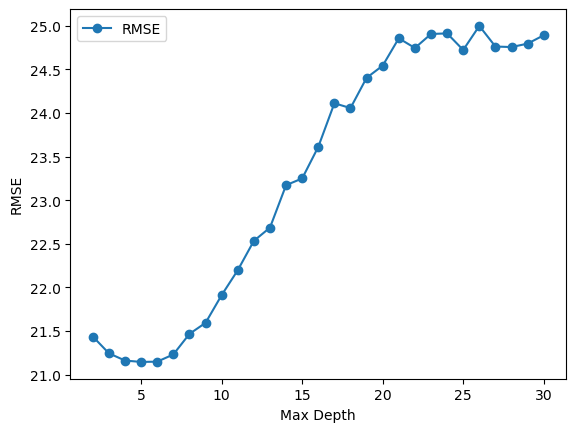

In [9]:
# Evolução da métrica RMSE com a profundidade máxima da árvore
plt.plot(max_depth_array, metrics_df['RMSE'].values, marker="o", label="RMSE")
plt.xlabel("Max Depth")
plt.ylabel("RMSE")
plt.legend();

In [10]:
# Exibe as 5 primeiras linhas do dataset ordenado do menor para o maior RMSE
metrics_df.sort_values(['RMSE'], ascending=True)[:5]

,max_depth,R2,MSE,RMSE,MAE,MAPE
3,5,0.063559,447.161319,21.146189,16.843452,8.395778
4,6,0.063296,447.286802,21.149156,16.748081,8.324423
2,4,0.062168,447.825853,21.161896,16.849288,8.536141
5,7,0.055961,450.789444,21.231803,16.739333,7.997561
1,3,0.054812,451.338427,21.244727,16.896550,8.469922


### Critério do menor `RMSE`: `max_depth = 5`

In [11]:
best_max_depth = 5

## 5.4 - Desempenho do modelo para os dados de teste

In [12]:
# Definição do modelo
decision_tree_test = DecisionTreeRegressor(max_depth = best_max_depth, random_state = 0)

# Juntar os dados de treino e validação
decision_tree_test.fit( pd.concat( [X_train, X_val] ),
                        pd.concat( [y_train, y_val] ) )

# Predição sobre os dados de teste
y_pred_test = decision_tree_test.predict( X_test )

# Métricas
df_metrics_test = metrics(y_test, y_pred_test, 'Test', 'Decision Tree Regressor')
df_metrics_test

,Algorithm,Step,R2,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,Test,0.0905,442.8484,21.044,16.8298,7.8832


# 6.0 - Gera as planilhas com os resultados

In [13]:
exporta_excel('Decision_Tree')